In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads/lending_club_loan_dataset.csv")

In [3]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [5]:
df["term"].unique()

array([' 36 months', ' 60 months', ' 36 Months'], dtype=object)

In [ ]:
# preprocessing
# *data cleaning
#   **missing data
#   **duplication
#   **outliers
#   **errors
  
  
# data transformation
#   **cataerogical encoding
#     **split data X,Y
#     **imbalaced data
    
    
#     ***split transformation
  
  
  
#   **numerical transformation scaling

In [28]:
df.isna().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [29]:
df.drop(columns=["last_major_derog_none"],inplace=True) 

In [30]:
df.dropna(subset=["dti"],inplace=True)

In [31]:
df.isna().sum()

id                       0
grade                    0
annual_inc               0
short_emp                0
emp_length_num           0
home_ownership        1475
dti                      0
purpose                  0
term                     0
last_delinq_none         0
revol_util               0
total_rec_late_fee       0
od_ratio                 0
bad_loan                 0
dtype: int64

In [32]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    9770
RENT        7002
OWN         1599
Name: count, dtype: int64

In [33]:
df["home_ownership"].fillna(df["home_ownership"].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16268\2606738391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["home_ownership"].fillna(df["home_ownership"].mode()[0],inplace=True)


In [34]:
df.isna().sum()

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
num_imputer=SimpleImputer(strategy="median")
cat_imputer=SimpleImputer(strategy="most_frequent")

In [38]:
df[["home_ownership"]]=cat_imputer.fit_transform(df[["home_ownership"]])

In [39]:
df.isna().sum()

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

<Axes: >

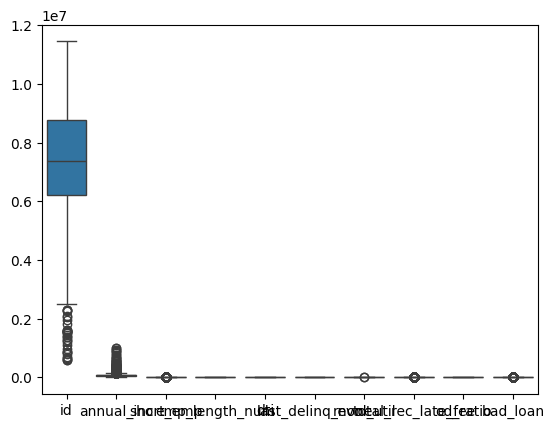

In [41]:
sns.boxplot(df)

In [42]:
df.drop(columns=["id"],inplace=True)

<Axes: ylabel='annual_inc_log'>

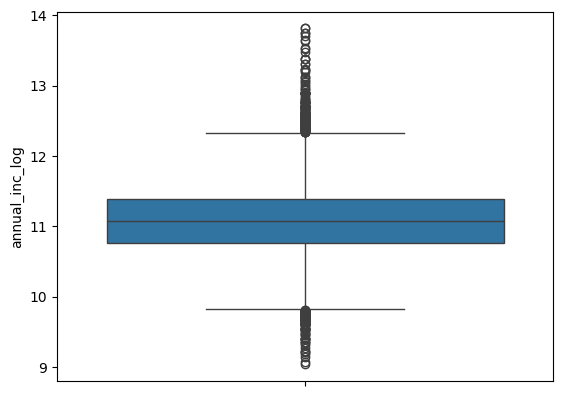

In [43]:
df["annual_inc_log"]=np.log1p(df["annual_inc"])
sns.boxplot(data=df,y="annual_inc_log")

<Axes: ylabel='annual_inc_log'>

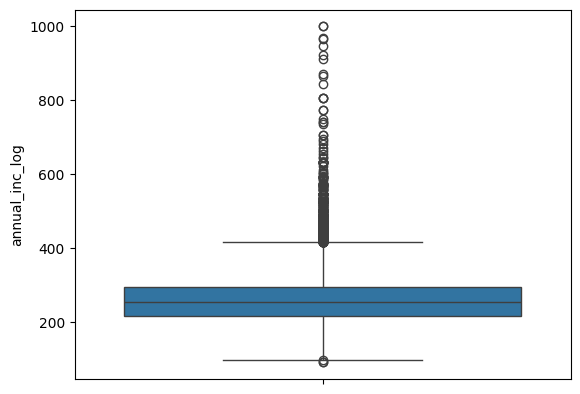

In [44]:
df["annual_inc_log"]=np.sqrt(df["annual_inc"])
sns.boxplot(data=df,y="annual_inc_log")

In [49]:
df_copy=df.copy()

In [ ]:
Q1=df_copy["annual_inc"].quantile(0.25)
Q3=df_copy["annual_inc"].quantile(0.75)
IQR=Q3-Q1
mask_outliers=((df_copy["annual_inc"] < Q1-3*IQR)|(df_copy["annual_inc"] > Q3+3*IQR))
df_copy=df_copy[mask_outliers]

<Axes: >

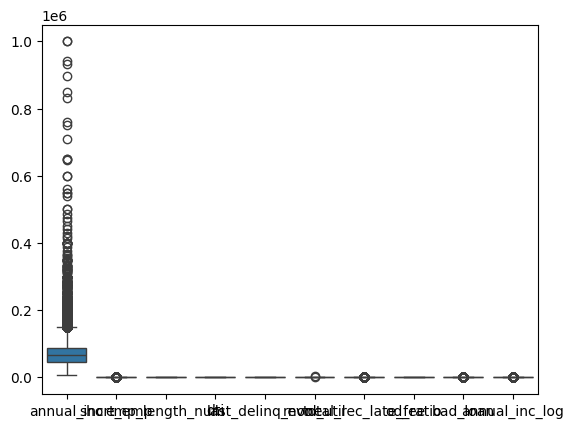

In [51]:
sns.boxplot(df_copy)

In [52]:
df.drop(columns="annual_inc_sqrt",inplace=True)

KeyError: "['annual_inc_sqrt'] not found in axis"

In [53]:
df_copy.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,annual_inc_log
0,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0,316.227766
1,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0,288.097206
2,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1,279.284801
3,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1,193.742097
4,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0,254.950976
